# Course Overview: What is this class for?!

This class will teach you both the practice and underlying principles of *detecting* and *estimating* signals in noise. We'll tackle problems like the following.

## Face recognition and detection

Given many images of individual faces, how can we learn to tell individuals apart?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


# Load the faces datasets
faces = fetch_olivetti_faces()
images = faces.images
data = faces.data
targets = faces.target
print(targets)
image_shape = (64, 64)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12
 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17
 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19
 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22
 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27
 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29
 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32 32 32 32
 32 32 32 32

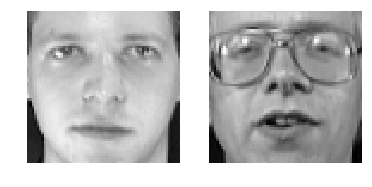

In [6]:
sub = plt.subplot(1,2,1)
sub.axis("off")
plt.imshow(images[0],cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,2,2)
sub.axis("off")
plt.imshow(images[10],cmap=plt.cm.gray,interpolation="nearest")

plt.show()

These are two images from a database, included with the Python package scikit-learn, of face images of AT&T employees. We have ten images of each of these individuals. Can we learn to tell them apart? In class we'll study *logistic regression*, a method for learning a classifier from a few data samples.

In [7]:
logistic = LogisticRegression()

#grab nine images from each class for training
training_images = np.concatenate((data[0:9],data[10:19]))
training_labels = np.concatenate((targets[0:9],targets[10:19]))

#train the logistic classifier on the selected images
logistic.fit(training_images,training_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We just ran the code to train the classifier on nine images of each person. How well can it tell who a *new* image is?

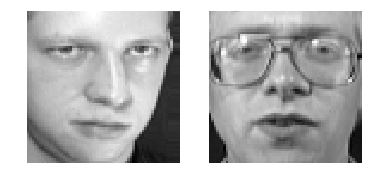

[[ 0.99311048  0.00688952]]
[[ 0.02549349  0.97450651]]


In [8]:
sub = plt.subplot(1,2,1)
sub.axis("off")
plt.imshow(images[9],cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,2,2)
sub.axis("off")
plt.imshow(images[19],cmap=plt.cm.gray,interpolation="nearest")

plt.show()

nine_probabilities = logistic.predict_proba(data[9].reshape(1, -1))
nineteen_probabilities = logistic.predict_proba(data[19].reshape(1, -1))

print(nine_probabilities)
print(nineteen_probabilities)

Looks like it worked pretty well! This semester we'll look under the hood, see how this method works, how robust this kind of performance is, and how to improve the performance.

## Image Denoising and Inpainting

If an image is corrupted by noise or missing pixels, how can we recover the original? Let's see by corrupting one of the test images we used previously.

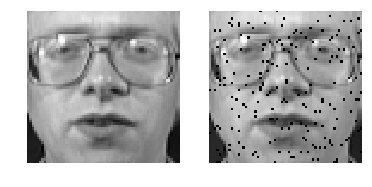

In [9]:
noisy_test_image = data[19]
corrupted_pixels = np.random.choice(64*64,200) #choose a small number of pixels to erase
noisy_test_image[corrupted_pixels] = 0

sub = plt.subplot(1,2,1)
sub.axis("off")
plt.imshow(images[19],cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,2,2)
sub.axis("off")
plt.imshow(noisy_test_image.reshape(64,64),cmap=plt.cm.gray,interpolation="nearest")

plt.show()

To fix the corrupted pixels, we'll use a technique called *principal components analysis*. It learns a low-dimensional basis for the images, and we can project the image onto this basis. PCA allows a sort of data-driven low-pass filter.

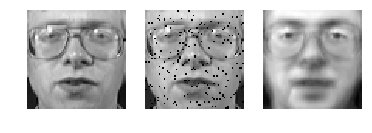

In [12]:
#Train the model using the *rest* of the dataset
pca = PCA(n_components=10);
pca_training_images = np.concatenate((data[0:19],data[20:400]))
pca.fit(pca_training_images)

#Filter out the noise on the test image using PCA
denoised_test_image = pca.inverse_transform(pca.transform(noisy_test_image.reshape(1, -1)))

#Plot the result
sub = plt.subplot(1,3,1)
sub.axis("off")
plt.imshow(images[19],cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,3,2)
sub.axis("off")
plt.imshow(noisy_test_image.reshape(64,64),cmap=plt.cm.gray,interpolation="nearest")

sub = plt.subplot(1,3,3)
sub.axis("off")
plt.imshow(denoised_test_image.reshape(64,64),cmap=plt.cm.gray,interpolation="nearest")

plt.show()

PCA did an excellent job eliminating the blank pixels. However, it also "smoothed" the image--blurring out the details a bit and making it look more like other images in the training set. During the semester we'll dig in to denoising methods further and see what it will take to improve performance.